In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
path = '//home//renato//ENV//Tecnologia//Datacamp/Data//' 
file = 'online.csv'

In [3]:
online = pd.read_csv(path+file)

In [4]:
online.drop(['Unnamed: 0'], axis=1, inplace= True)

In [5]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    70864 non-null  int64  
 1   StockCode    70864 non-null  object 
 2   Description  70864 non-null  object 
 3   Quantity     70864 non-null  int64  
 4   InvoiceDate  70864 non-null  object 
 5   UnitPrice    70864 non-null  float64
 6   CustomerID   70864 non-null  int64  
 7   Country      70864 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.3+ MB


In [6]:
online.InvoiceDate = pd.to_datetime(online['InvoiceDate'])

In [7]:
# Define a function that will parse the date
def get_day(x): 
    return dt.datetime(x.year, x.month,x.day)

# Define a function that will parse the date
def get_month(x): 
    return dt.datetime(x.year, x.month,1)

In [8]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [9]:
# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

# Group by CustomerID and select the InvoiceMonth value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

In [10]:
# Assign a minimum InvoiceMonth value to the dataset
online['CohortMonth'] = grouping.transform('min')


# View the top 5 rows
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [12]:
# Get the integers for date parts from the InvoiceMonthcolumn
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceMonth')

# Get the integers for date parts from the CohortMonth columnCohortDay
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortMonth')

In [13]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


In [14]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [15]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)

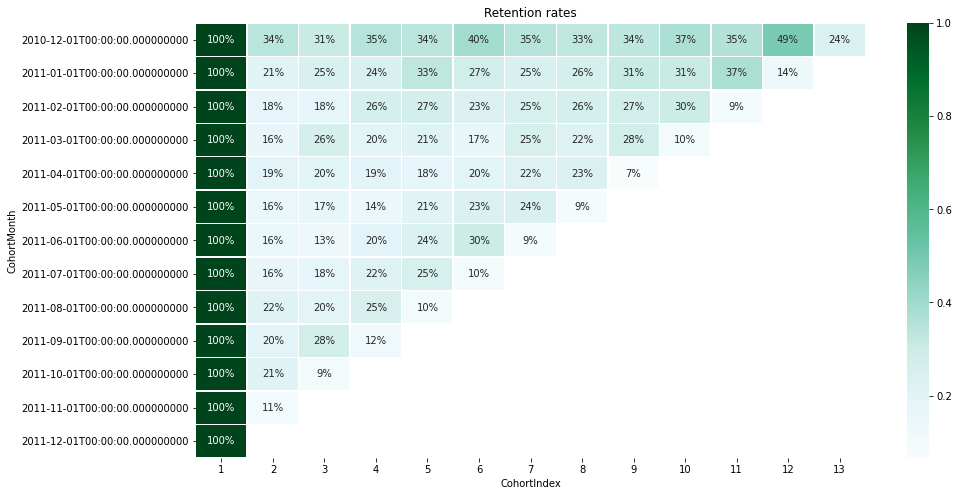

In [16]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,annot=True, fmt = '.0%', cmap = 'BuGn', linewidths=.5)
plt.show()

In [17]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

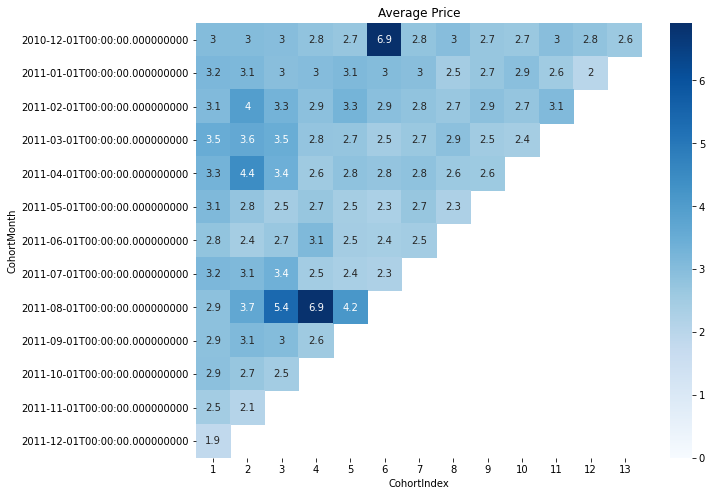

In [18]:
plt.figure(figsize=(10, 8))
plt.title('Average Price')
sns.heatmap(average_price,annot= True,vmin = 0.0, cmap = 'Blues')
plt.show()

In [19]:
cohort_data_count = grouping['UnitPrice'].count()

# Reset the index of cohort_data
cohort_data = cohort_data_count.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

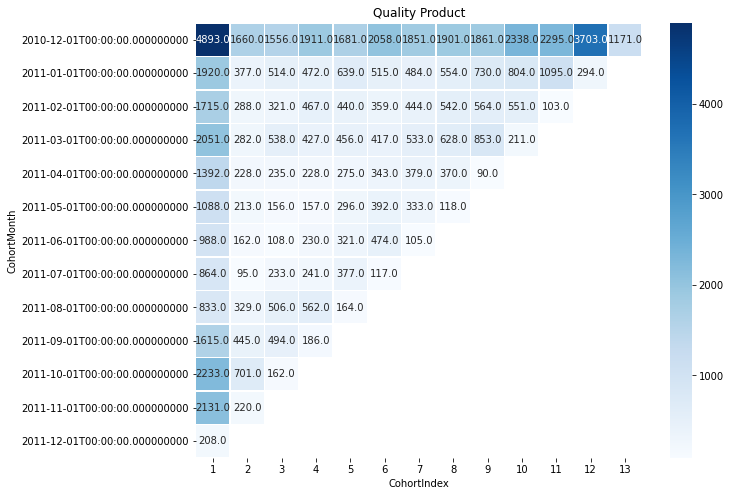

In [20]:
plt.figure(figsize=(10, 8))
plt.title('Quality Product')
sns.heatmap(average_quantity.round(1), fmt = '',annot= True, cmap = 'Blues',linewidths=.5)
plt.show()

# Chapter 2: RFM

In [21]:
online_2 = pd.read_csv('//home//renato//ENV//Tecnologia//Datacamp//Data//online12M.csv')

In [22]:
online_2.drop('Unnamed: 0',inplace=True, axis=1)
online_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


In [23]:
online_2.InvoiceDate = pd.to_datetime(online_2['InvoiceDate'])

In [24]:
online_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68176 entries, 0 to 68175
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    68176 non-null  int64         
 1   StockCode    68176 non-null  object        
 2   Description  68176 non-null  object        
 3   Quantity     68176 non-null  int64         
 4   InvoiceDate  68176 non-null  datetime64[ns]
 5   UnitPrice    68176 non-null  float64       
 6   CustomerID   68176 non-null  int64         
 7   Country      68176 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.2+ MB


In [25]:
snapshot_date = online_2['InvoiceDate'].max() + dt.timedelta(days=1)

In [26]:
# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online_2.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'UnitPrice': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,122.02
12748,1,888,2945.68
12749,4,37,161.75
12820,4,17,33.57
12822,71,9,24.16


In [27]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

In [28]:
# Create labels for MonetaryValue
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)
print(datamart['RFM_Score'].head())

CustomerID
12747    9.0
12748    9.0
12749    9.0
12820    8.0
12822    6.0
Name: RFM_Score, dtype: float64


In [29]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12747,3,25,122.02,3,3,3,9.0
12748,1,888,2945.68,3,3,3,9.0
12749,4,37,161.75,3,3,3,9.0
12820,4,17,33.57,3,3,2,8.0
12822,71,9,24.16,2,2,2,6.0


In [30]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 8:
        return 'Top'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return 'Middle'
    else:
        return 'Low'

In [31]:
# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12747,3,25,122.02,3,3,3,9.0,Top
12748,1,888,2945.68,3,3,3,9.0,Top
12749,4,37,161.75,3,3,3,9.0,Top
12820,4,17,33.57,3,3,2,8.0,Top
12822,71,9,24.16,2,2,2,6.0,Middle


In [32]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         149.6       4.1          12.7  1636
Middle       64.4      12.5          38.2   941
Top          22.6      46.6         143.1  1066

# Chapter 3

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12747,3,25,122.02,3,3,3,9.0,Top
12748,1,888,2945.68,3,3,3,9.0,Top
12749,4,37,161.75,3,3,3,9.0,Top
12820,4,17,33.57,3,3,2,8.0,Top
12822,71,9,24.16,2,2,2,6.0,Middle


In [35]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3643.00000,3643.000000,3643.000000,3643.000000
mean,90.43563,18.714247,57.437939,5.982981
std,94.44651,43.754468,209.810704,2.055046
min,1.00000,1.000000,0.080000,3.000000
25%,19.00000,4.000000,9.900000,4.000000
50%,51.00000,9.000000,26.690000,6.000000
75%,139.00000,21.000000,58.620000,8.000000
max,365.00000,1497.000000,8204.530000,9.000000


In [36]:
# Calculate Recency, Frequency and Monetary value for each customer 
data = online_2.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'})

# Rename the columns 
data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'UnitPrice': 'MonetaryValue'}, inplace=True)

# Print top 5 rows


In [37]:
data = data.reset_index().drop('CustomerID', axis=1)

In [38]:
data

,Recency,Frequency,MonetaryValue
0,3,25,122.02
1,1,888,2945.68
2,4,37,161.75
3,4,17,33.57
4,71,9,24.16
...,...,...,...
3638,278,2,11.65
3639,181,2,4.20
3640,8,2,6.20
3641,4,152,238.53


# Primeira forma de realizar a normalização (Z)

In [39]:
### Center the data by subtracting average values from each entry
data_centered = data - data.mean()

### Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

### Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

### Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

       Recency  Frequency  MonetaryValue
count  3643.00    3643.00        3643.00
mean     -0.00      -0.00           0.00
std       1.00       1.00           1.00
min      -0.95      -0.40          -0.27
25%      -0.76      -0.34          -0.23
50%      -0.42      -0.22          -0.15
75%       0.51       0.05           0.01
max       2.91      33.79          38.83


# Segunda forma de realizar a normalização (Z)

In [40]:
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

       Recency  Frequency  MonetaryValue
count  3643.00    3643.00        3643.00
mean     -0.00      -0.00           0.00
std       1.00       1.00           1.00
min      -0.95      -0.40          -0.27
25%      -0.76      -0.34          -0.23
50%      -0.42      -0.22          -0.15
75%       0.51       0.05           0.01
max       2.91      33.79          38.84


/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

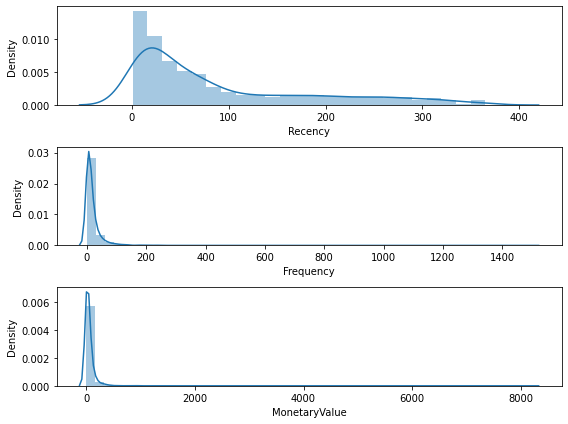

In [41]:
# Plot recency distribution
plt.figure(figsize=(8,6))
plt.subplot(3, 1, 1)
sns.distplot(data['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2)
sns.distplot(data['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3)
sns.distplot(data['MonetaryValue'])

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
# Unskew the data
datamart_log = np.log(data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=data.index, columns=data.columns)

In [43]:
datamart_normalized.head()

,Recency,Frequency,MonetaryValue
0,-2.002202,0.865157,1.196367
1,-2.814518,3.815272,3.495112
2,-1.789490,1.189117,1.399872
3,-1.789490,0.546468,0.264604
4,0.337315,0.020925,0.027117


/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

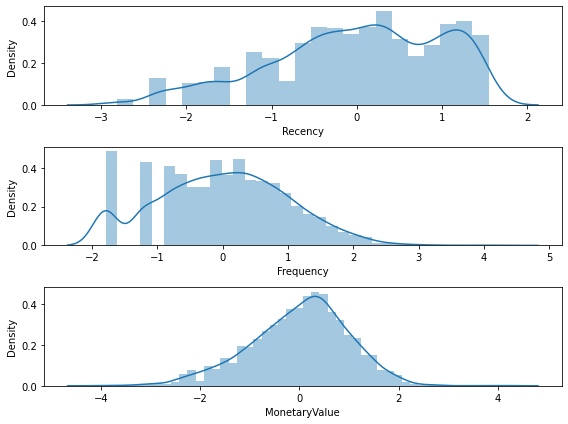

In [44]:
# Plot recency distribution
plt.figure(figsize=(8,6))
plt.subplot(3, 1, 1)
sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2)
sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3)
sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.tight_layout()
plt.show()

/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/renato/ENV/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

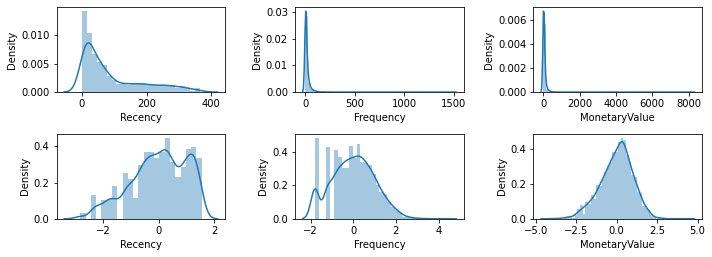

In [45]:
# Plot recency distribution
plt.figure(figsize=(10,5))

# Plot recency distribution
plt.subplot(3, 3, 1)
sns.distplot(data['Recency'])

# Plot frequency distribution
plt.subplot(3, 3, 2)
sns.distplot(data['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 3, 3)
sns.distplot(data['MonetaryValue'])



plt.subplot(3, 3, 4)
sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 3, 5)
sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 3, 6)
sns.distplot(datamart_normalized['MonetaryValue'])


# Show the plot
plt.tight_layout()
plt.show()

In [46]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [47]:
datamart_normalized['Cluster'] = kmeans.labels_

In [48]:
datamart_rfm_k3 = datamart_normalized.assign(Cluster=cluster_labels)

In [49]:
datamart_rfm_k3.head()

,Recency,Frequency,MonetaryValue,Cluster
0,-2.002202,0.865157,1.196367,1
1,-2.814518,3.815272,3.495112,1
2,-1.789490,1.189117,1.399872,1
3,-1.789490,0.546468,0.264604,1
4,0.337315,0.020925,0.027117,2


In [50]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_normalized.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           0.6      -1.2          -1.2  1059
1          -1.1       1.1           1.0  1032
2           0.3       0.1           0.2  1552

In [51]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [52]:
datamart_rfm_k2 = datamart_normalized.assign(Cluster=cluster_labels)

In [53]:
datamart_rfm_k2.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           1.0      -1.0          -1.0  1059
1          -0.0       0.0           0.0  2584

In [54]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

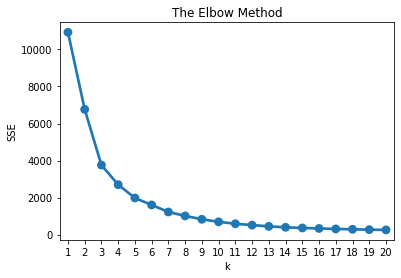

In [55]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [56]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [57]:
datamart_normalized['Cluster'] = kmeans.labels_
datamart_normalized['CustomerID'] = datamart.index

In [58]:
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
                    datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
)

In [59]:
datamart_melt.head()

,CustomerID,Cluster,Metric,Value
0,12747,2,Recency,-2.002202
1,12748,2,Recency,-2.814518
2,12749,2,Recency,-1.789490
3,12820,2,Recency,-1.789490
4,12822,0,Recency,0.337315


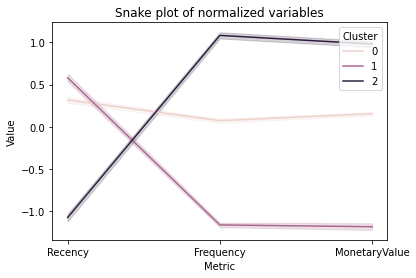

In [60]:
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

In [61]:
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart[['Recency', 'Frequency','MonetaryValue']].mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.99,-1.06,-1.02
1,-1.01,-0.94,-0.98
2,-1.00,-1.00,-1.00


In [62]:
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.581172,-1.161720,-1.183165
1,-1.073591,1.082481,0.980825
2,0.317323,0.072900,0.155129


In [63]:
population_avg

Recency          90.435630
Frequency        18.714247
MonetaryValue    57.437939
dtype: float64

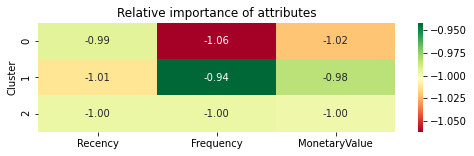

In [64]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()